# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

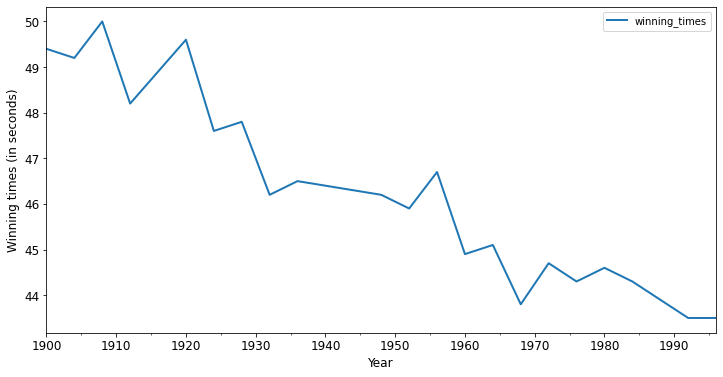

In [4]:
# Plot the time series
data.plot(figsize=(12, 6), linewidth=2, fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Winning times (in seconds)", fontsize=12);

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [5]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

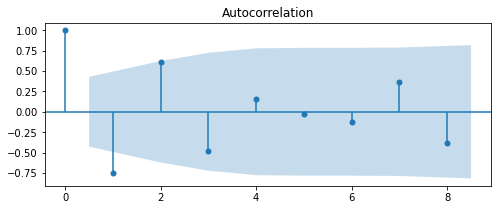

In [6]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(data_diff, ax=ax, lags=8);

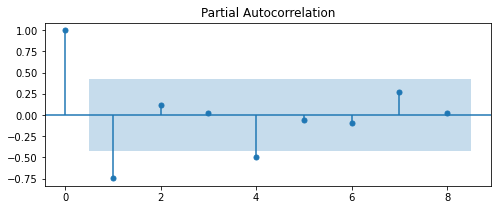

In [7]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(data_diff, ax=ax, lags=8, method="ywm");

## Yule-Walker method
The Yule-Walker method is a method for estimating the coefficients of an autoregressive (AR) model. In an AR model, the current value of a time series is modeled as a linear combination of its past values, with the coefficients of the past values being the parameters of the model.

The Yule-Walker method estimates the coefficients of the AR model by solving a set of linear equations that relate the current value of the time series to its past values. Specifically, the method uses the autocovariance function of the time series to derive a system of linear equations, which can then be solved to obtain the coefficients of the AR model.

One advantage of the Yule-Walker method is that it is computationally efficient and can be applied to relatively large datasets. However, it assumes that the time series is stationary, which may not be the case in practice. Additionally, the method only estimates the coefficients of the AR model, and not the variance or any other parameters that may be included in more complex models.

In practice, the Yule-Walker method is often used as an initial step in estimating the parameters of an AR model, with more sophisticated methods such as maximum likelihood estimation or Bayesian methods being used to refine the estimates.

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are both measures of the relative quality of statistical models for a given set of data.

AIC is a measure of the goodness of fit of a model, adjusted for the number of parameters in the model. It is calculated as follows:

AIC = -2 * log-likelihood + 2 * k

where log-likelihood is the natural logarithm of the maximum likelihood function of the model, and k is the number of parameters in the model. A lower AIC value indicates a better model fit, with the best model being the one with the lowest AIC value.

BIC is similar to AIC, but it penalizes models more heavily for having a large number of parameters. It is calculated as follows:

BIC = -2 * log-likelihood + log(n) * k

where log-likelihood and k are defined as above, and n is the sample size. BIC tends to select simpler models than AIC, especially when the sample size is small. As with AIC, a lower BIC value indicates a better model fit, with the best model being the one with the lowest BIC value.

In summary, AIC measures the trade-off between model complexity and goodness of fit, while BIC places a greater penalty on model complexity, leading to the selection of simpler models.

## AIC
The AIC (Akaike Information Criterion) is a measure of the relative quality of statistical models for a given set of data, and is often used to compare different models and select the best one. A lower AIC value indicates a better model fit, with the best model being the one with the lowest AIC value.

The AIC takes into account both the goodness of fit of the model and the complexity of the model, as measured by the number of parameters in the model. Thus, a model with a better balance of model fit and model complexity will have a lower AIC value.

When comparing different models, the one with the lowest AIC value is preferred, as it provides the best balance between goodness of fit and model complexity. However, it is important to note that the AIC does not provide an absolute measure of model quality, and different models may be appropriate for different purposes or under different assumptions. Additionally, the AIC does not account for uncertainty in the parameter estimates, and other measures such as confidence intervals or hypothesis tests may be needed to fully evaluate the model.

## BIC
The BIC (Bayesian Information Criterion) is another statistical measure used to evaluate the quality of a statistical model, such as an ARIMA model. Like the AIC, the BIC penalizes models with more parameters, but it does so more heavily, making it more useful when selecting among complex models.

The BIC measures the trade-off between the goodness of fit of the model (how well it fits the data) and the complexity of the model (how many parameters it has). It is defined as:

BIC = -2 * log(L) + k * log(n)

where:
- L is the likelihood of the model (how well it fits the data)
- k is the number of parameters in the model
- n is the number of observations in the data

The lower the BIC value, the better the model, as this indicates a better trade-off between goodness of fit and model complexity. When comparing different models, the model with the lowest BIC value is generally preferred.

So in summary, the BIC tells us how well the model fits the data while taking into account the number of parameters in the model, with lower BIC values indicating better models.

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARMA(1,0) model
mod_arma = ARIMA(data_diff, order=(1, 0, 0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.054
Date:                Fri, 28 Apr 2023   AIC                             46.107
Time:                        17:43:34   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2885      0.081     -3.559      0.000      -0.447      -0.130
ar.L1         -0.7186      0.144     -5.005      0.000      -1.000      -0.437
sigma2         0.3819      0.180      2.121      0.0

An ARIMA model is a type of time series model that can be used to forecast future values of a time series.

The order of an ARIMA model is a set of three numbers: p, d, and q. These numbers represent different aspects of the model, which are:

p: how much the current value of the time series depends on past values of the time series (also called "autocorrelation")

d: how many times we need to subtract the time series from itself in order to make it stationary (which means it has a constant mean and variance over time)

q: how much the current value of the time series depends on past errors in the model (also called "moving average")


To determine the values of p, d, and q for an ARIMA model, we can look at plots of the time series and its autocorrelation and partial autocorrelation functions, or we can use statistical criteria like AIC or BIC to compare different models with different values of p, d, and q.

In [10]:
# Fit an ARMA(5,1) model
mod_arma = ARIMA(data_diff, order=(5, 0, 1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(5, 0, 1)   Log Likelihood                 -16.203
Date:                Fri, 28 Apr 2023   AIC                             48.406
Time:                        17:56:01   BIC                             56.762
Sample:                    12-31-1904   HQIC                            50.220
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2937      0.070     -4.203      0.000      -0.431      -0.157
ar.L1         -0.0519      5.556     -0.009      0.993     -10.941      10.838
ar.L2          0.6213      3.752      0.166      0.8

In [20]:
# Fit an ARMA(2,2) model
mod_arma = ARIMA(data_diff, order=(2, 0, 0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -19.931
Date:                Fri, 28 Apr 2023   AIC                             47.863
Time:                        17:58:39   BIC                             52.041
Sample:                    12-31-1904   HQIC                            48.770
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2835      0.090     -3.152      0.002      -0.460      -0.107
ar.L1         -0.6307      0.208     -3.031      0.002      -1.039      -0.223
ar.L2          0.1133      0.212      0.534      0.5

## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here
"""
Depending on whether you pick AIC or BIC as a model selection criterion, 
your result may vary. In this situation, you'd generally go for a model with fewer parameters, 
so ARMA(1,0) seems fine. Note that we have a relatively short time series, 
which can lead to a more difficult model selection process.
"""

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 